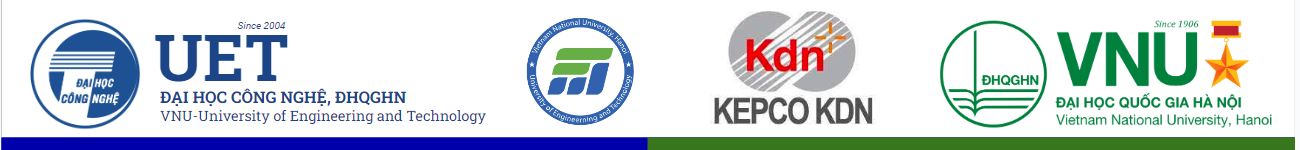

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

# Pytorch cơ bản

Tensor, các phép tính

.cuda()

In [ ]:
x = torch.rand(2)
print("x", x)
print("x add", x+3)
print("x mul", x*3)

x tensor([0.2754, 0.5049])
x add tensor([3.2754, 3.5049])
x mul tensor([0.8262, 1.5148])


In [ ]:
# nhân ma trận
x = torch.rand(2,3)
y = torch.rand(3,2)
z = torch.matmul(x,y)
print(z)
z.shape

tensor([[1.0127, 0.8128],
        [1.1233, 1.0008]])


torch.Size([2, 2])

In [ ]:
# tạo tensor từ data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
import numpy as np
# tạo tensor từ NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
# nhân ma trận
x = torch.rand(1,2,3)
y = torch.rand(2,3,2)
z = torch.matmul(x,y) # auto broadcast first dimention
z.shape

torch.Size([2, 2, 2])

In [ ]:
# thay đổi kích thước tensor
trans_z = z.t()
exp_z = z**3
flat_z = z.flatten()
reshape_z = z.reshape(-1)

print(trans_z)

In [ ]:
# thuộc tính tensor
print(f"Datatype of tensor: {z.dtype}")
print(f"Device tensor is stored on: {z.device}")

Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# kiểm tra gpu
torch.cuda.is_available()

True

In [ ]:
# một số cách sử dụng GPU
print(x_np.to('cuda'))
print(x_np.cuda())
print(torch.tensor(data, device=torch.device('cuda')))

In [ ]:
tens = torch.ones(3,4)
print(tens)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

print(torch.tensor(data, device=device))

In [ ]:
# sử dụng GPU
x = torch.rand(1,3)
linear = nn.Linear(3, 5)

x = x.cuda() # đưa tensor vào cuda (gpu)
linear = linear.cuda() # đưa layer vào cuda (gpu)
linear(x)

tensor([[ 0.0308,  0.7678,  0.1753, -0.0462, -0.8784]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

# Một số Layer cơ bản

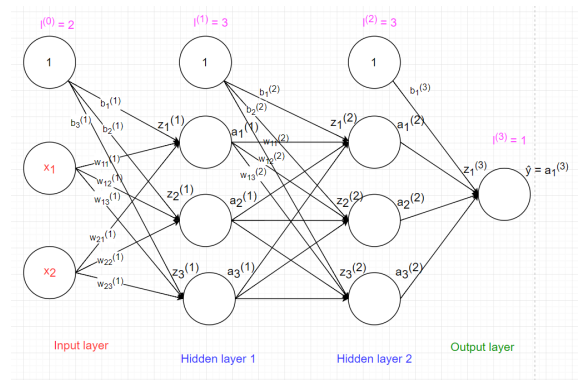

## Linear

In [ ]:
linear = nn.Linear(5, 2)
x = torch.rand(12, 5)
z = linear(x)
z.shape

torch.Size([12, 2])

In [ ]:
# Details in https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
linear = nn.Linear(5, 2)
x = torch.rand(5)
print('x', x.shape, x)
z = linear(x)
z.shape, z

x torch.Size([5]) tensor([0.9524, 0.8728, 0.3754, 0.0315, 0.5297])


(torch.Size([2]), tensor([-0.0855, -0.4709], grad_fn=<AddBackward0>))

## Hàm kích hoạt

###Relu
![abc](https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png)

In [ ]:
# Details in https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
relu = nn.ReLU()
x = torch.rand(3) - 0.5
print('x', x)
relu(x)

x tensor([-0.3554, -0.2719,  0.4313])


tensor([0.0000, 0.0000, 0.4313])

### Softmax
![](https://www.researchgate.net/profile/Junaid-Qadir/publication/348703101/figure/fig5/AS:983057658040324@1611390618742/Graphic-representation-of-the-softmax-activation-function.ppm)

In [ ]:
# C1 sử dụng nn.Softmax (https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
l_softmax = nn.Softmax(1)
x = 5*torch.rand(2,3)
print('x', x)
out = l_softmax(x)
out

x tensor([[3.3470, 2.9203, 4.3906],
        [1.3232, 3.7709, 4.9267]])


tensor([[0.2226, 0.1453, 0.6321],
        [0.0203, 0.2346, 0.7451]])

In [ ]:
# C2 sử dụng nn.functional.Softmax (https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html)
out = nn.functional.softmax(x, dim=1)
out

tensor([[0.2226, 0.1453, 0.6321],
        [0.0203, 0.2346, 0.7451]])

## Dropout

In [ ]:
# Details in https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
x = torch.rand(10)
dropout = nn.Dropout(p=0.2)
dropout(x)

tensor([1.1778, 0.0000, 0.1365, 1.1548, 0.0000, 0.9399, 0.0000, 0.3713, 1.2478,
        0.1524])

## Convolution

In [ ]:
# nn.Conv2d(https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
conv2d = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
print('conv2d weight', conv2d.weight.shape)
x = torch.rand(1,5,5)
out = conv2d(x)
out.shape

conv2d weight torch.Size([3, 1, 3, 3])


torch.Size([3, 5, 5])

In [ ]:
# nn.Conv2d(https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
conv2d = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
print('conv2d weight', conv2d.weight.shape)
x = torch.rand(1,5,5)
out = conv2d(x)
out.shape

conv2d weight torch.Size([3, 1, 3, 3])


torch.Size([3, 5, 5])

In [ ]:
conv2d.weight

Parameter containing:
tensor([[[[ 0.3311,  0.2249, -0.3030],
          [ 0.1497,  0.0314, -0.1337],
          [-0.2846, -0.2675, -0.2058]]],


        [[[ 0.0507,  0.0271,  0.2163],
          [-0.3002,  0.0837, -0.3121],
          [-0.2624, -0.2449,  0.1718]]],


        [[[ 0.0736, -0.1109, -0.0815],
          [ 0.1714,  0.2020, -0.0231],
          [ 0.2066,  0.3189, -0.3078]]]], requires_grad=True)

# Dataset + Dataloader

In [ ]:
import pandas as pd
import numpy as np


from torchvision import datasets
from torchvision.transforms import ToTensor # transform PIL image to torch.Tensor
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt # print image

## Tự tạo Dataset

In [ ]:
df_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df_test = pd.read_csv('/content/sample_data/mnist_test.csv')
len(df_train), len(df_test)

(19999, 9999)

In [ ]:
class MnistDataset(Dataset):
    def __init__(self, mnist_data: np.array):
        self.mnist_data = mnist_data

    def __getitem__(self, index):
        features = self.mnist_data[index][1:]
        label = self.mnist_data[index][0]
        return features, label

    def __len__(self):
        return len(self.mnist_data)

In [ ]:
train_data = df_train.to_numpy()
test_data = df_test.to_numpy()
train_ds = MnistDataset(train_data)
test_ds = MnistDataset(test_data)

batch_size = 100
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

for x, y in train_dataloader:
    print('x', x.shape)
    print('y', y.shape)
    print(y)
    break

x torch.Size([100, 784])
y torch.Size([100])
tensor([9, 7, 4, 7, 2, 3, 5, 8, 7, 1, 8, 6, 3, 2, 5, 4, 9, 4, 6, 6, 2, 3, 9, 0,
        3, 7, 4, 6, 7, 0, 3, 8, 3, 0, 4, 1, 9, 7, 8, 4, 2, 3, 0, 1, 7, 1, 9, 4,
        7, 5, 1, 4, 8, 8, 9, 0, 9, 8, 0, 4, 3, 6, 3, 1, 4, 2, 3, 6, 5, 7, 7, 9,
        2, 7, 4, 9, 1, 5, 7, 5, 9, 2, 8, 8, 7, 0, 6, 9, 0, 5, 0, 0, 3, 5, 1, 6,
        1, 9, 3, 8])


In [ ]:
x_batch,y_batch = next(iter(train_dataloader))
print(x_batch.shape)

torch.Size([100, 784])


In [ ]:
type(next(iter(train_dataloader)))

list

In [ ]:
next(iter(train_dataloader))

[tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 tensor([1, 7, 3, 9, 3, 0, 7, 7, 3, 3, 5, 5, 5, 1, 8, 9, 5, 8, 1, 1, 5, 9, 5, 9,
         9, 2, 9, 5, 5, 4, 9, 0, 6, 2, 7, 7, 1, 6, 0, 4, 1, 9, 4, 6, 4, 6, 9, 3,
         8, 4, 1, 6, 7, 6, 7, 7, 5, 2, 9, 2, 4, 0, 9, 6, 7, 3, 5, 1, 1, 1, 1, 9,
         7, 9, 3, 6, 4, 4, 7, 8, 1, 7, 7, 9, 9, 3, 2, 5, 0, 8, 1, 6, 3, 7, 1, 2,
         4, 7, 2, 2])]

## Load từ thư viện torchvision

In [ ]:
# Load dataset
train_ds = datasets.MNIST('./data', train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST('./data', train=False, download=True, transform=ToTensor())

print(f"train {len(train_ds)} test {len(test_ds)}")

100%|██████████| 9912422/9912422 [00:00<00:00, 138132170.19it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 78202513.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 74720349.59it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7941029.08it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

train 60000 test 10000


In [ ]:
type(train_ds), type(train_ds[0]), type(train_ds[0][0])

(torchvision.datasets.mnist.MNIST, tuple, torch.Tensor)

In [ ]:
# the first training sample
x, y = train_ds[0]
print("input type", type(x))
print("input size", x.shape)
print("output type", type(y))
print("target", y)

input type <class 'torch.Tensor'>
input size torch.Size([1, 28, 28])
output type <class 'int'>
target 5


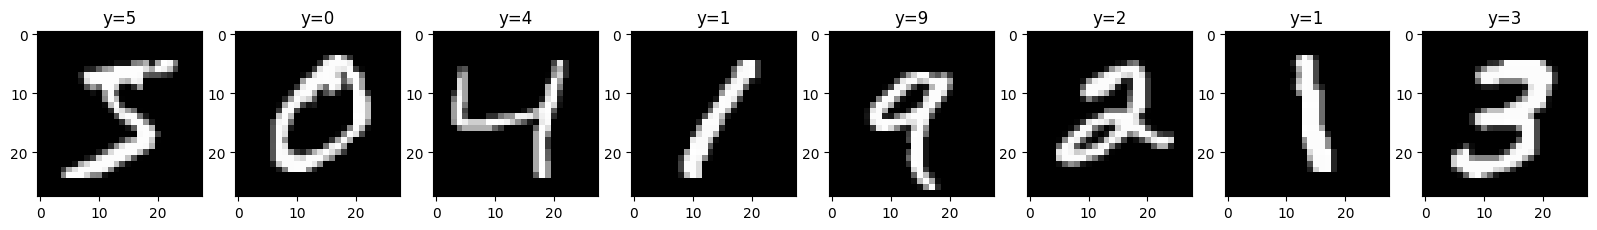

In [ ]:
# plot a grid of samples with targets
def plot_grid(ds, n):
    ncols = 8
    nrows = n // ncols + 1 if n%ncols!=0 else n//ncols
    plt.subplots(nrows, ncols, figsize=(20, 10))
    for i, (x, y) in enumerate(ds):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[0], cmap="gray")
        plt.title(f'y={y:01d}')
        if i >= n-1:
            break

plot_grid(train_ds, 8)

In [ ]:
# user DataLoader to create mini-batch
batch_size = 16

# training dataloader (with shuffling)
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)

# test dataloader (no shuffling)
test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

# Checking the dataset
for images, labels in train_dataloader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break


Image batch dimensions: torch.Size([16, 1, 28, 28])
Image label dimensions: torch.Size([16])


#**Multi-layer Perception (MLP)**

In [ ]:
# define a multi-layer perceptrons
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # first layer 784 --> 100, relu activation
        self.fc1 = nn.Linear(28*28, 100, bias=False)
        self.relu1 = nn.ReLU()

        # output layer 100 --> 10 class, linear activation
        self.fc2 = nn.Linear(100, 10, bias=False)

    def forward(self, x):
        b, c, h, w = x.shape
        x = x.view(b, 28*28) # change (batchsize, 1, 28, 28) into (batchsize, 28*28) to apply linear fc1

        # first layer
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        # print('out fc1', out.shape)

        return out


In [ ]:
x = torch.rand(12, 1,28,28)

model = MLP()
output = model(x)
output.shape

out fc1 torch.Size([12, 100])


torch.Size([12, 10])

In [ ]:
# test model with inputs
model = MLP() # MLP

# define loss function
loss_func = nn.CrossEntropyLoss()


# learning rate
lr = 0.001

# use Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
# change epoch
n_epoch = 2

print(f'Number of epoch: {n_epoch}\nLearning rate: {lr} -- Batch size: {batch_size}')
model.cuda()
for epoch in range(n_epoch):

    # training phase
    model.train()
    print(f"epoch {epoch} started")
    for x, y in train_dataloader:
        # compute output of the model on the mini-batch
        x = x.cuda()
        y = y.cuda()
        out = model(x)

        # compute loss function
        loss = loss_func(out, y)

        # calculate derivative and do a gradient descent step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # testing phase
    model.eval()
    total = len(test_ds)
    total_correct = 0 # count number of correct predictions on test set

    for x, y in test_dataloader:
        with torch.no_grad(): # prevent gradient computation
            x = x.cuda()
            y = y.cuda()
            out = model(x)

            pred = torch.argmax(out, dim=1) # take the maximum output
            corrects = (pred == y).sum().item() # count the correct predictions
            total_correct += corrects

    # compute test accuracy for this epoch
    accuracy = total_correct / total
    print(f"epoch {epoch} accuracy {accuracy*100:.2f}%")

epoch 0 accuracy 77.24%
epoch 1 started
epoch 1 accuracy 84.40%


In [ ]:
# thử  với 1 dữ liệu
tmp = datasets.MNIST('./data', train=True, download=True)
x = tmp[100][0]
x

In [ ]:
model = model.cuda()

x_tensor = ToTensor()(x)
x_tensor = torch.unsqueeze(x_tensor, dim=0)
x_tensor = x_tensor.cuda()
model(x_tensor)

RuntimeError: ignored

**Exercises**: Try improving performance of the model by
1. Using more training epochs
2. Using different learning rate
3. Add more layer as description:
    <br>Linear1 -> Dropout -> Relu1 -> Linear2 -> Dropout ->Relu2 ->Linear3

**Exercise 2:** Test với dữ liệu cụ thể

Lấy dữ liệu thứ 13 của tập `test_ds` và dùng mô hình dự đoán nhãn.

In [ ]:
x, y = test_ds[13]
...

pred = ...


#**Convolutional Neural Network**

![picture](https://drive.google.com/uc?id=1Jz1tllPTE9y4klj7zlMA0TwlAz6jAMYN)

In [ ]:
class CNN_Basic(nn.Module):
    def __init__(self):
        super(CNN_Basic, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        # self.dropout1 = nn.Dropout(0.25)
        # self.dropout2 = nn.Dropout(0.5)

        self.fc1 = nn.Linear(3136, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.relu1(x)
        print('x conv1', x.shape)
        print('x pool1', x.shape)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.relu2(x)
        # x = self.dropout1(x)
        print('x conv2', x.shape)
        print('x pool2', x.shape)

        x = torch.flatten(x, 1)
        print('x flatten', x.shape)
        x = self.fc1(x)
        x = self.relu3(x)
        # x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
model = CNN_Basic()
x = torch.rand(12,1,28,28)
z = model(x)
z.shape

x conv1 torch.Size([12, 32, 14, 14])
x pool1 torch.Size([12, 32, 14, 14])
x conv2 torch.Size([12, 64, 7, 7])
x pool2 torch.Size([12, 64, 7, 7])
x flatten torch.Size([12, 3136])


torch.Size([12, 10])

In [ ]:
# test model with inputs
model = CNN_Basic() # MLP

# define cross entropy loss
loss_func = nn.CrossEntropyLoss()

# use Stochastic Gradient Descent optimizer
arr_lr = [0.1, 0.01, 0.001]
lr = arr_lr[1] # change learning_rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# change epoch
n_epoch = 2

print(f'Number of epoch: {n_epoch}\nLearning rate: {lr} -- Batch size: {batch_size}')
model.cuda()
for epoch in range(n_epoch):

    # training phase
    model.train()
    print(f"epoch {epoch} started")
    for x, y in train_dataloader:
        # compute output of the model on the mini-batch
        x = x.cuda()
        out = model(x)

        # compute loss function
        loss = loss_func(out, y.cuda())

        # calculate derivative and do a gradient descent step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # testing phase
    model.eval()
    total = len(test_ds)
    total_correct = 0 # count number of correct predictions on test set

    for x, y in test_dataloader:
        with torch.no_grad(): # prevent gradient computation
            x = x.cuda()
            out = model(x)
            # take the maximum output
            pred = torch.argmax(out, dim=1)
            # count the correct predictions
            corrects = (pred == y.cuda()).sum().item()
            total_correct += corrects

    # compute test accuracy for this epoch
    accuracy = total_correct / total
    print(f"epoch {epoch} accuracy {accuracy*100:.2f}%")

Number of epoch: 2
Learning rate: 0.01 -- Batch size: 16
epoch 0 started
epoch 0 accuracy 98.31%
epoch 1 started
epoch 1 accuracy 98.64%


In [ ]:
PATH = './model_cnn.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
model_load = torch.load(PATH)

# Recurrent Neural Network (RNN)

In [ ]:
!gdown 1cqyu7dpjHjqTaz8XDH46CUTwFFQOLfcx

!unzip AG_news.zip

Downloading...
From: https://drive.google.com/uc?id=1cqyu7dpjHjqTaz8XDH46CUTwFFQOLfcx
To: /content/AG_news.zip
100% 11.9M/11.9M [00:00<00:00, 32.7MB/s]
Archive:  AG_news.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df_train = pd.read_csv('train.csv')
df_train['Class Index'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: Class Index, dtype: int64

In [ ]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.columns = ['label', 'title', 'text']

num_sample_label = 2500
df_train = df_train.groupby('label').apply(lambda x: x.sample(n=num_sample_label)).reset_index(drop = True)

print(len(df_train), '\n', df_train.label.value_counts())

df_train.head()

10000 
 1    2500
2    2500
3    2500
4    2500
Name: label, dtype: int64


,label,title,text
0,1,Behind the hostage crisis,Nobody could fail to be moved by Lil Bigley #3...
1,1,Russia Using Soviet Tactics Over Ukraine -- Wa...,WARSAW (Reuters) - Russia's refusal to cooper...
2,1,UN agency agrees to police Iranian enrichment ...,"VIENNA, Austria - The UN nuclear agency agreed..."
3,1,World Briefings,BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime M...
4,1,Study: U.S. Needs to Fight Medicare Fraud (AP),AP - Fraud in the #36;300-billion-a-year Medi...


## Chuẩn bị dữ liệu Dataset + Dataloader

In [ ]:
%%time
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import spacy
from collections import Counter

class TextClassificationDataset(Dataset):
    def __init__(self, dataframe, sequence_length):
        self.dataframe = dataframe
        self.sequence_length = sequence_length
        self.nlp = spacy.load("en_core_web_sm")
        self.vocab = self.build_vocab()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row['text']
        label = row['label']
        label = label-1

        # Tokenize và xử lý văn bản
        tokens = self.tokenize(text)
        tokens = self.pad_sequence(tokens)

        # Chuyển đổi từ văn bản thành indices
        text_indices = [self.vocab[word] for word in tokens]

        # Chuyển đổi label thành tensor
        label_tensor = torch.tensor(label, dtype=torch.long)

        return {
            'text': torch.tensor(text_indices, dtype=torch.long),
            'label': label_tensor
        }

    def tokenize(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]

    def pad_sequence(self, tokens):
        if len(tokens) >= self.sequence_length:
            return tokens[:self.sequence_length]
        else:
            pad_length = self.sequence_length - len(tokens)
            return tokens + ['<PAD>'] * pad_length

    def build_vocab(self):
        # Đếm tần suất của các từ
        word_counter = Counter()
        for idx, row in self.dataframe.iterrows():
            tokens = self.tokenize(row['text'])
            word_counter.update(tokens)

        # Tạo từ điển và thêm token '<PAD>'
        vocab = {'<PAD>': 0}
        for word, freq in word_counter.items():
            vocab[word] = len(vocab)

        return vocab

# Đọc dữ liệu từ DataFrame
dataframe = df_train.copy()


# Tạo dataset từ DataFrame
sequence_length = 100  # Độ dài chuỗi đầu vào
dataset = TextClassificationDataset(dataframe, sequence_length)

# Chia dữ liệu thành tập train và tập test (hoặc validation)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Tạo DataLoader cho train và test
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


CPU times: user 2min 18s, sys: 359 ms, total: 2min 18s
Wall time: 2min 19s


## Huấn luyện mô hình RNN cơ bản

In [ ]:
for x in train_loader:
    print(x)
    print(x['text'].shape)
    print(x['label'].shape)
    break

{'text': tensor([[   78,  1465,    31,  ...,     0,     0,     0],
        [25950,    22,    23,  ...,     0,     0,     0],
        [  236,    25,    78,  ...,     0,     0,     0],
        ...,
        [25984,  2266,  1523,  ...,    41, 25998,    30],
        [  974,   975,   434,  ...,     0,     0,     0],
        [15347, 13202, 17485,  ...,     0,     0,     0]]), 'label': tensor([2, 3, 0, 3, 3, 1, 2, 2, 1, 0, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 0, 3, 1,
        3, 1, 0, 2, 2, 3, 3, 3, 3, 1, 1, 0, 1, 0, 0, 3, 3, 3, 2, 2, 3, 1, 2, 0,
        0, 0, 0, 0, 2, 0, 3, 1, 0, 1, 3, 1, 2, 3, 0, 1])}
torch.Size([64, 100])
torch.Size([64])


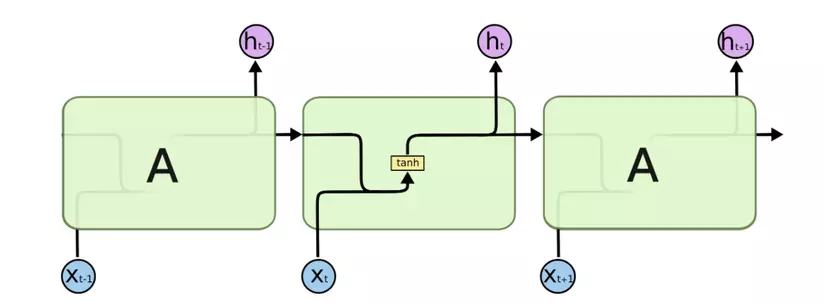

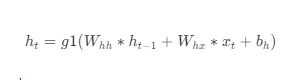

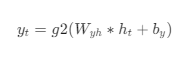

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Định nghĩa mô hình RNN cơ bản
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_len, hidden_dim, output_dim, n_layers):
        super(SimpleRNN, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_len)
        self.rnn = nn.RNN(input_size=embed_len, hidden_size=hidden_dim, num_layers=n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, X_batch):
        embeddings = self.embedding_layer(X_batch)
        output, hidden = self.rnn(embeddings)
        return self.linear(output[:,-1])

# Tham số của mô hình
input_dim = len(dataset.vocab)  # Kích thước từ điển
embedding_dim = 100  # Kích thước vector nhúng từ
hidden_dim = 256  # Kích thước hidden state của RNN
output_dim = int(dataframe['label'].nunique())
n_layers = 1


# Khởi tạo mô hình
model = SimpleRNN(input_dim, embedding_dim, hidden_dim, output_dim, n_layers)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hàm tính accuracy
def accuracy(preds, y):
    max_preds = preds.argmax(dim=1, keepdim=True)  # Lấy chỉ số của lớp có xác suất cao nhất
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

# Huấn luyện mô hình
model.train()
for epoch in range(10):  # Số lượng epoch
    running_loss = 0.0
    running_acc = 0.0
    for batch in train_loader:
        text = batch['text']
        label = batch['label']

        optimizer.zero_grad()

        outputs = model(text)
        loss = criterion(outputs, label)
        acc = accuracy(outputs, label)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += acc.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_acc / len(train_loader)

    print(f'Epoch {epoch+1:02}')
    print(f'\tTrain Loss: {epoch_loss:.3f} | Train Acc: {epoch_acc*100:.2f}%')

print('Finished Training')


Epoch 01
	Train Loss: 1.402 | Train Acc: 24.14%
Epoch 02
	Train Loss: 1.430 | Train Acc: 24.64%
Epoch 03
	Train Loss: 1.409 | Train Acc: 25.81%
Epoch 04
	Train Loss: 1.402 | Train Acc: 25.34%
Epoch 05
	Train Loss: 1.396 | Train Acc: 25.77%
Epoch 06
	Train Loss: 1.397 | Train Acc: 25.90%
Epoch 07
	Train Loss: 1.401 | Train Acc: 25.55%
Epoch 08
	Train Loss: 1.394 | Train Acc: 26.24%
Epoch 09
	Train Loss: 1.397 | Train Acc: 24.04%
Epoch 10
	Train Loss: 1.394 | Train Acc: 26.01%
Finished Training
